Name : ธีรพงค์ ศันสนียวรรธน์ <br>
Date : 1 June 2564 <br>
Description : <br>
ทำ A/B Testing กับแบบสอบถามโดยใช้ Python <br> <br>

เป็นส่วนหนึ่งของวิชา BADS 7105 Customer Analytics <br>
อาจารย์ผู้สอน ดร. ธนชาตย์ ฤทธิ์บำรุง <br> <br>
สาขาวิชาการวิเคราะธ์ธุรกิจและวิทยาการข้อมูล DS รุ่นที่ 5 <br>
คณะสถิติประยุกต์ <br>
สถาบันบัณฑิตพัฒนบริหารศาสตร์ (นิด้า) NIDA <br>

In [1]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/nueng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Add Thai Font
# ที่มา https://www.facebook.com/groups/colab.thailand/permalink/1421960354645985/
import matplotlib as mpl
plt.rcParams['font.family']='K2D'
mpl.font_manager.fontManager.addfont('./fonts/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

# Load and View Dataset

In [3]:
ab_test_df = pd.read_excel('./data/ab_test_data.xlsx')
ab_test_df.head()

,User,Gender,หุ่นบาง,หุ่นมีกล้าม
0,1,0,4,2
1,5,0,2,4
2,6,0,3,4
3,8,0,2,4
4,9,0,4,4


In [4]:
ab_test_df['Gender'].value_counts()

0    15
1    11
Name: Gender, dtype: int64

# 1. Normality Test
ตรวจสอบว่าข้อมูลมีการกระจายตัวเป็น Gaussian Distribution หรือไม่

In [5]:
from scipy.stats import shapiro

group1 = ab_test_df['หุ่นบาง'].tolist()
group2 = ab_test_df['หุ่นมีกล้าม'].tolist()

print(f'Testing Result of ab_test_df[\'หุ่นบาง\']')
stat, p = shapiro(group1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has Gaussian distribution\n')
else:
    print('Probably do not have Gaussian distribution\n')
    
print(f'Testing Result of  ab_test_df[\'หุ่นมีกล้าม\']')
stat, p = shapiro(group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has Gaussian distribution')
else:
    print('Probably do not have Gaussian distribution')

Testing Result of ab_test_df['หุ่นบาง']
stat=0.853, p=0.002
Probably do not have Gaussian distribution

Testing Result of  ab_test_df['หุ่นมีกล้าม']
stat=0.794, p=0.000
Probably do not have Gaussian distribution


<AxesSubplot:ylabel='Frequency'>

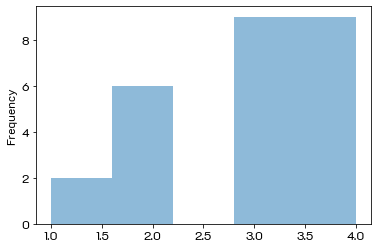

In [6]:
ab_test_df['หุ่นบาง'].plot.hist(bins=5, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

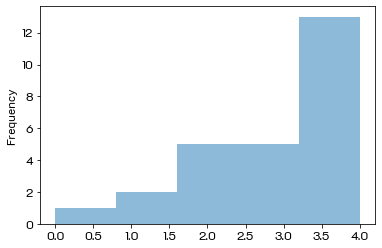

In [7]:
ab_test_df['หุ่นมีกล้าม'].plot.hist(bins=5, alpha=0.5)

# 2. Correlation Test
ตรวจสอบว่าข้อมูล 2 กลุ่มเป็นอิสระกันหรือไม่ <br>
### 2.1 Pearson's Correlation Coefficient
H0: the two samples are independent<br>
H1: there is a dependency between the samples<br>

In [8]:
from scipy.stats import pearsonr
group1 = ab_test_df['หุ่นบาง'].tolist()
group2 = ab_test_df['หุ่นมีกล้าม'].tolist()
stat, p = pearsonr(group1, group2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The two samples are independent.')
else:
    print('There is a dependency between the samples')

stat=-0.387, p=0.051
The two samples are independent.


### 2.2 Spearman's Rank Correlation Test
H0: the two samples are independent <br>
H1: there is a dependency between the samples  <br>

In [9]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
group1 = ab_test_df['หุ่นบาง'].tolist()
group2 = ab_test_df['หุ่นมีกล้าม'].tolist()
stat, p = spearmanr(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent: the two samples are independent.')
else:
    print('Probably dependent: there is a dependency between the samples. ')

stat=-0.414, p=0.035
Probably dependent: there is a dependency between the samples. 


### The Paired t-test

In [10]:
# the Paired t-test for all dataset
from scipy.stats import ttest_rel

group1 = ab_test_df['หุ่นบาง'].tolist()
group2 = ab_test_df['หุ่นมีกล้าม'].tolist()

stat, p = ttest_rel(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e H0: the means of the samples are equal.')
else:
    print('Probably has different distributions i.e H1: the means of the samples are unequal.')

stat=-0.219, p=0.828
Probably has same distribution i.e H0: the means of the samples are equal.


In [11]:
# the Paired t-test for male's dataset
from scipy.stats import ttest_rel

male_df = ab_test_df[ab_test_df['Gender']==1]

group1 = male_df['หุ่นบาง'].tolist()
group2 = male_df['หุ่นมีกล้าม'].tolist()

stat, p = ttest_rel(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e H0: the means of the samples are equal.')
else:
    print('Probably has different distributions i.e H1: the means of the samples are unequal.')

stat=-0.191, p=0.852
Probably has same distribution i.e H0: the means of the samples are equal.


In [12]:
# the Paired t-test for female dataset
from scipy.stats import ttest_rel

female_df = ab_test_df[ab_test_df['Gender']==0]

group1 = female_df['หุ่นบาง'].tolist()
group2 = female_df['หุ่นมีกล้าม'].tolist()

stat, p = ttest_rel(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e H0: the means of the samples are equal.')
else:
    print('Probably has different distributions i.e H1: the means of the samples are unequal.')

stat=-0.130, p=0.898
Probably has same distribution i.e H0: the means of the samples are equal.


### ANOVA Test

In [13]:
# ANOVA Test for all dataset
from scipy.stats import f_oneway

group1 = ab_test_df['หุ่นบาง'].tolist()
group2 = ab_test_df['หุ่นมีกล้าม'].tolist()

stat, p = f_oneway(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e the means of the samples are equal.')
else:
    print('Probably has different distributions i.e one or more of the means of the samples are unequal.')

stat=0.066, p=0.798
Probably has same distribution i.e the means of the samples are equal.


In [14]:
# ANOVA Test for male dataset
from scipy.stats import f_oneway

male_df = ab_test_df[ab_test_df['Gender']==1]

group1 = male_df['หุ่นบาง'].tolist()
group2 = male_df['หุ่นมีกล้าม'].tolist()

stat, p = f_oneway(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e the means of the samples are equal.')
else:
    print('Probably has different distributions i.e one or more of the means of the samples are unequal.')

stat=0.043, p=0.837
Probably has same distribution i.e the means of the samples are equal.


In [15]:
# ANOVA Test for female dataset
from scipy.stats import f_oneway

female_df = ab_test_df[ab_test_df['Gender']==0]

group1 = female_df['หุ่นบาง'].tolist()
group2 = female_df['หุ่นมีกล้าม'].tolist()

stat, p = f_oneway(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably has same distribution i.e the means of the samples are equal.')
else:
    print('Probably has different distributions i.e one or more of the means of the samples are unequal.')

stat=0.025, p=0.875
Probably has same distribution i.e the means of the samples are equal.
